# App Reviews Sentiment Analysis

Bu projede LinkedIn uygulaması hakkında yapılan yorumların duygu analizini yapıyoruz.
<br>Projede kullanılan veriler <a href="https://thecleverprogrammer.com/2023/12/04/app-reviews-sentiment-analysis-using-python/" href="_blank">
buradan</a> temin edilmiştir.
<br>
<br>
Duygu Analizi (Sentiment Analysis) bir metni içerdiği manaya göre üç gruba ayırmaktadır:
* Olumlu (Positive)
* Nötr (Neutral)
* Olumsuz (Negative)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("linkedin-reviews.csv")

### Keşfedici Veri Analizi (EDA)

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
df.Rating.value_counts()

Rating
1    275
4    122
3    121
5     95
2     89
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


<Axes: ylabel='count'>

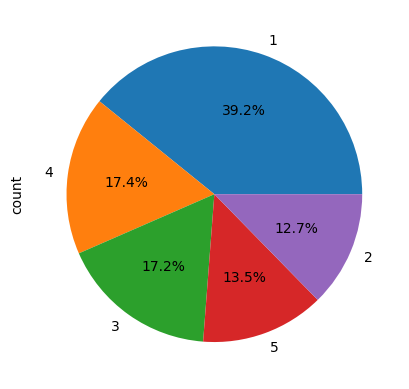

In [6]:
df["Rating"].value_counts().plot.pie(autopct="%1.1f%%")

In [7]:
df['Length'] = df['Review'].apply(len)

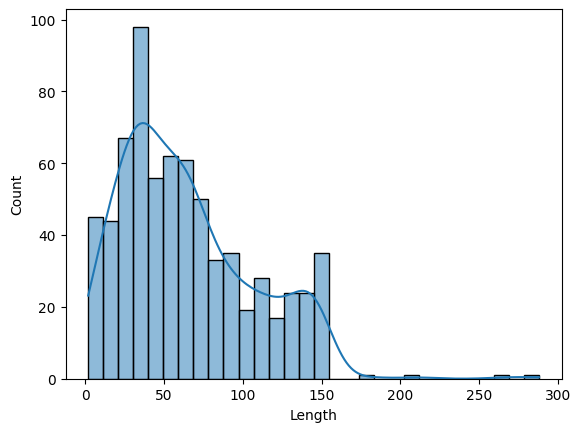

In [8]:
sns.histplot(x=df["Length"], bins=30, kde=True);

### Sentiment Analizi

In [9]:
def clean_text(text):
    # 1- Küçük harfe çevir
    text=text.str.lower()
    # 2 - Noktalama işaretlerini kaldır
    text=text.str.replace('[^\w\s]', '', regex=True)
    # 3 - Rakamları kaldır
    text=text.str.replace('\d+', '', regex=True)
    # 4 - Satır sonu karakterlerini kaldır (^t, ^p)
    text=text.str.replace('\n', '', regex=True)
    text=text.str.replace('\r', '', regex=True)
    return text

In [10]:
df["Review"]=clean_text(df["Review"])

In [11]:
def get_sentiment(text):
    analysis = TextBlob(text) 
    if analysis.sentiment.polarity > 0.1: 
        return 'positive'
    elif analysis.sentiment.polarity < -0.1: 
        return 'negative'
    else: 
        return 'neutral'

In [13]:
df["sentiment"]=df["Review"].map(get_sentiment)

In [14]:
df.sample(5)

,Review,Rating,Length,sentiment
643,awsum,4,5,neutral
385,will not open since latest updates,1,34,positive
136,doesnt sync contacts with addressbook,2,38,neutral
215,cant change my profile in the app no settings ...,2,88,neutral
488,doesnt update to show messages or connect requ...,3,142,neutral


<Axes: xlabel='sentiment', ylabel='count'>

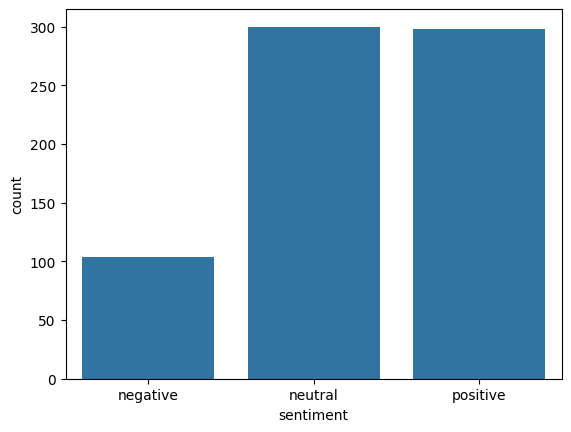

In [15]:
sns.countplot(x=df["sentiment"])

<Axes: ylabel='count'>

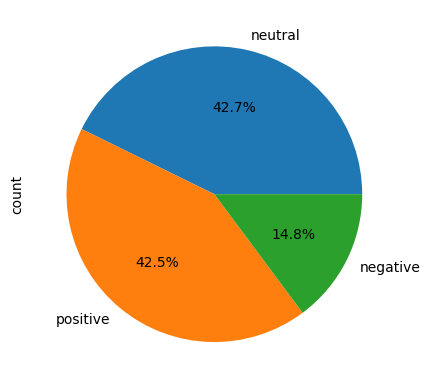

In [30]:
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: xlabel='Rating', ylabel='count'>

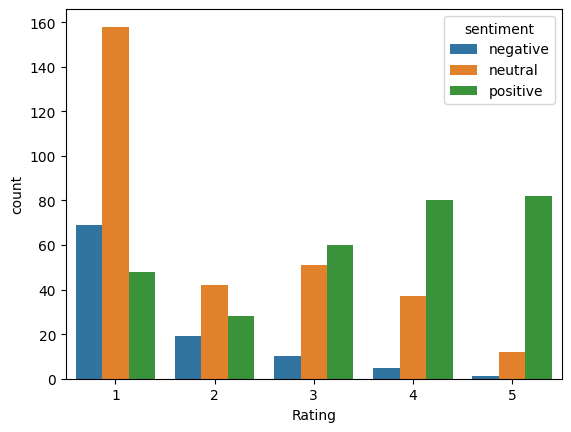

In [16]:
sns.countplot(x=df["Rating"], hue=df["sentiment"])

In [19]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def wc(data, bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [20]:
pos=df[df['sentiment']=="positive"]["Review"]
neg=df[df['sentiment']=="negative"]["Review"]

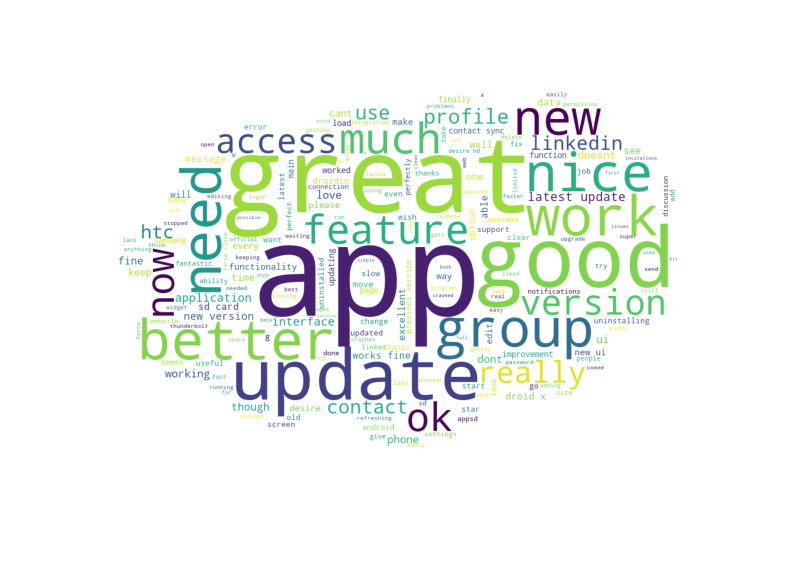

In [21]:
wc(pos, "white")

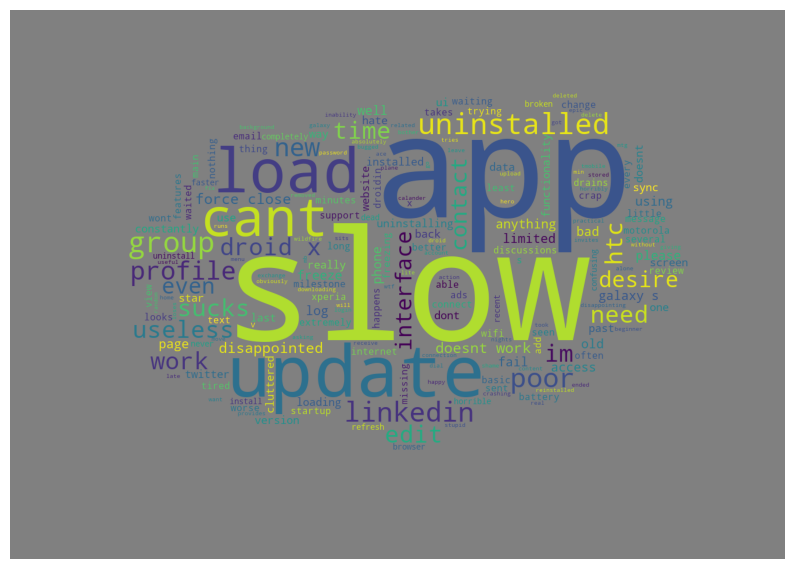

In [25]:
wc(neg, "gray")

In [26]:
dfneg=df[df["sentiment"]=="negative"]
dfneg.reset_index(drop=True, inplace=True)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

text_data = dfneg["Review"].tolist()
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)
features = vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1

top_7_indices = word_frequencies.argsort()[:-8:-1]
top_7_words = [features[idx] for idx in top_7_indices]
top_7_frequencies = [word_frequencies[idx] for idx in top_7_indices]

for word, freq in zip(top_7_words, top_7_frequencies):
    print(f"Word: {word}, Frequency: {freq}")

Word: slow, Frequency: 34
Word: app, Frequency: 29
Word: update, Frequency: 11
Word: load, Frequency: 9
Word: uninstalled, Frequency: 9
Word: doesnt, Frequency: 8
Word: poor, Frequency: 8


### Sonuç:
* LinkedIn hakkında yapılan 702 adet yorum ifadesi metin önişleme adımları ile temizlendikten sonra sentiment analizi yapıldı.
* Yapılan analiz sonucunda yorumların %42.5'i olumlu, %42.7'si nötr, %14.8'i olumsuz ifadeler içermektedir.
* Yapılan sentiment analizi bazında Rating analizine göre:
  * Rating değeri arttıkça negatif ve nötr ifadelerin sayısının azaldığı
  * Yüksek Rating değerlerinde fazla olsa da düşük Rating değerine sahip mesajların da olumlu duygular içerdiği görülmektedir.
* Olumsuz ifadelerde en çok tekrar eden kelimelerin yavaşlık, uygulama, güncelleme, yükleme, kaldırma ve zayıflık olduğu tespit edilmiştir.